In [247]:
import pandas as pd
df=pd.read_excel("C:/Users/preet/Downloads/ppm data.xlsx")

In [248]:
df

,Material,Supplier,MvT,Quantity,Pstng Date,Region,Team
0,A1,S1,1,1000,January,South,alpha
1,A2,S2,1,1050,February,South,alpha
2,A3,S3,1,1100,March,North,alpha
3,A4,S4,1,1150,April,North,alpha
4,A5,S5,1,1200,May,North,beta
...,...,...,...,...,...,...,...
1315,A16,S6,5,14,April,West,beta
1316,A17,S7,5,15,May,West,beta
1317,A18,S8,5,16,June,East,gamma
1318,A19,S9,5,17,July,East,gamma


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Material    1320 non-null   object
 1   Supplier    1320 non-null   object
 2   MvT         1320 non-null   int64 
 3   Quantity    1320 non-null   int64 
 4   Pstng Date  1320 non-null   object
 5   Region      1320 non-null   object
 6   Team        1320 non-null   object
dtypes: int64(2), object(5)
memory usage: 72.3+ KB


In [250]:
mat_ppm = df.pivot_table(index='Material', columns='MvT', values='Quantity',aggfunc='sum',fill_value=0).reset_index()
mat_ppm['Receipt'] = mat_ppm[1] - mat_ppm[2]
mat_ppm['Rejection'] = mat_ppm[3] - mat_ppm[4]
mat_ppm['Scrap'] = mat_ppm[5]
mat_ppm['PPM'] = ((mat_ppm['Rejection'] + mat_ppm['Scrap']) / mat_ppm['Receipt'])*1000000
mat_ppm = mat_ppm.sort_values(by='PPM', ascending=False)
mat_ppm

MvT,Material,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
6,A15,211800,-4798,1020,-575,65,216598,1595,65,7663.967350
5,A14,210140,-4198,970,-545,61,214338,1515,61,7352.872566
4,A13,208480,-3598,920,-515,57,212078,1435,57,7035.147446
3,A12,206820,-2998,870,-485,53,209818,1355,53,6710.577739
2,A11,204985,-2499,820,-455,81,207484,1275,81,6535.443697
17,A7,233440,-10298,655,-635,83,243738,1290,83,5633.097835
16,A6,231630,-9798,635,-600,79,241428,1235,79,5442.616432
15,A5,229820,-9298,615,-565,75,239118,1180,75,5248.454738
11,A2,224665,-7798,555,-595,63,232463,1150,63,5218.034698
0,A1,222965,-7298,535,-560,71,230263,1095,71,5063.774901


In [256]:
supp_ppm = df.pivot_table(index='Supplier', columns='MvT', values='Quantity', aggfunc='sum', fill_value=0).reset_index()
supp_ppm['Receipt'] = supp_ppm[1] - supp_ppm[2]
supp_ppm['Rejection'] = supp_ppm[3] - supp_ppm[4]
supp_ppm['Scrap'] = supp_ppm[5]
supp_ppm['PPM'] = ((supp_ppm['Rejection'] + supp_ppm['Scrap']) / supp_ppm['Receipt'])*1000000
supp_ppm = supp_ppm.sort_values(by='PPM', ascending=False)
supp_ppm

MvT,Supplier,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
5,S5,441620,-14096,1635,-1140,140,455716,2775,140,6396.527662
4,S4,438205,-12996,1565,-1075,132,451201,2640,132,6143.603405
2,S2,431485,-10796,1425,-1080,116,442281,2505,116,5926.096757
3,S3,434845,-11896,1495,-1010,124,446741,2505,124,5884.841552
0,S1,427950,-9797,1355,-1015,152,437747,2370,152,5761.318753
9,S9,455770,-18496,850,-1295,172,474266,2145,172,4885.444034
7,S7,448560,-16296,955,-1135,156,464856,2090,156,4831.603765
6,S6,445090,-15196,945,-1130,148,460286,2075,148,4829.605941
1,S10,459240,-19596,870,-1240,171,478836,2110,171,4763.635149
8,S8,452165,-17396,780,-1215,164,469561,1995,164,4597.911666


In [252]:
team_ppm = df.pivot_table(index='Team', columns='MvT', values='Quantity', aggfunc='sum', fill_value=0).reset_index()
team_ppm['Receipt'] = team_ppm[1] - team_ppm[2]
team_ppm['Rejection'] = team_ppm[3] - team_ppm[4]
team_ppm['Scrap'] = team_ppm[5]
team_ppm['PPM'] = ((team_ppm['Rejection'] + team_ppm['Scrap']) / supp_ppm['Receipt'])*1000000
team_ppm = team_ppm.sort_values(by='PPM', ascending=False)
team_ppm

MvT,Team,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
0,alpha,1732485,-45485,5840,-4180,524,1777970,10020,524,24086.972612
1,beta,1335270,-45588,3535,-3405,444,1380858,6940,444,15420.728600
2,gamma,1367175,-55488,2500,-3750,507,1422663,6250,507,15277.617623


In [253]:
mat_ppm = df.pivot_table(index='Pstng Date', columns='MvT', values='Quantity',aggfunc='sum',fill_value=0).reset_index()
mat_ppm['Receipt'] = mat_ppm[1] - mat_ppm[2]
mat_ppm['Rejection'] = mat_ppm[3] - mat_ppm[4]
mat_ppm['Scrap'] = mat_ppm[5]
mat_ppm['PPM'] = ((mat_ppm['Rejection'] + mat_ppm['Scrap']) / mat_ppm['Receipt'])*1000000
mat_ppm = mat_ppm.sort_values(by='PPM', ascending=False)
mat_ppm

MvT,Pstng Date,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
7,March,353515,-12296,1205,-1060,113,365811,2265,113,6500.624639
9,November,376775,-9197,1325,-815,136,385972,2140,136,5896.800804
6,June,362005,-14396,950,-1120,121,376401,2070,121,5820.919711
3,February,386405,-11196,1160,-1005,125,397601,2165,125,5759.542858
8,May,359175,-13396,915,-1045,135,372571,1960,135,5623.089290
4,January,383425,-10496,1115,-950,118,393921,2065,118,5541.720294
0,April,356345,-13396,800,-1040,119,369741,1840,119,5298.303407
2,December,379605,-9796,1080,-865,111,389401,1945,111,5279.904263
5,July,365010,-11598,975,-875,128,376608,1850,128,5252.145467
10,October,373810,-14598,920,-765,120,388408,1685,120,4647.175135


In [255]:
supp_ppm = df.pivot_table(index=['Supplier','Pstng Date'], columns='MvT', values='Quantity', aggfunc='sum', fill_value=0).reset_index()
supp_ppm['Receipt'] = supp_ppm[1] - supp_ppm[2]
supp_ppm['Rejection'] = supp_ppm[3] - supp_ppm[4]
supp_ppm['Scrap'] = supp_ppm[5]
supp_ppm['PPM'] = ((supp_ppm['Rejection'] + supp_ppm['Scrap']) / supp_ppm['Receipt'])*1000000
supp_ppm = supp_ppm.sort_values(by='PPM', ascending=False)
supp_ppm

MvT,Supplier,Pstng Date,1,2,3,4,5,Receipt,Rejection,Scrap,PPM
32,S5,March,70420,-2298,580,-320,26,72718,900,26,12734.123601
27,S4,February,69890,-2198,540,-305,24,72088,845,24,12054.710909
18,S3,January,69360,-2098,500,-290,22,71458,790,22,11363.318313
14,S2,December,68830,-1998,460,-275,20,70828,735,20,10659.626137
4,S1,November,68300,-1999,420,-260,50,70299,680,50,10384.215992
43,S7,July,66180,-6800,305,-335,36,72980,640,36,9262.811729
40,S6,June,65650,-6400,300,-320,35,72050,620,35,9090.909091
33,S5,May,65120,-6000,295,-305,34,71120,600,34,8914.510686
24,S4,April,64590,-5600,290,-290,33,70190,580,33,8733.437812
20,S3,March,64060,-5200,285,-275,32,69260,560,32,8547.502166


In [259]:
import pandas as pd
import numpy as np

# Define the date range for 6 years, month by month
date_range = pd.date_range(start='2018-01-01', end='2023-12-31', freq='MS')

# Generate PPM values with a pattern
ppm_values = []
for date in date_range:
    if date.month in [3, 9]:
        ppm = np.random.uniform(500, 1000)  # Higher PPM values for March and September
    elif date.month in [11, 12]:
        ppm = np.random.uniform(80, 100)    # Lower PPM values for November and December
    else:
        ppm = np.random.uniform(200, 400)   # Intermediate values for other months
    ppm_values.append(ppm)

# Create DataFrame
data = {
    'Date': date_range,
    'ppm': ppm_values
}
df = pd.DataFrame(data)

In [260]:
df

,Date,ppm
0,2018-01-01,274.908024
1,2018-02-01,390.142861
2,2018-03-01,865.996971
3,2018-04-01,319.731697
4,2018-05-01,231.203728
...,...,...
67,2023-08-01,360.439396
68,2023-09-01,537.275322
69,2023-10-01,397.377387
70,2023-11-01,95.444895


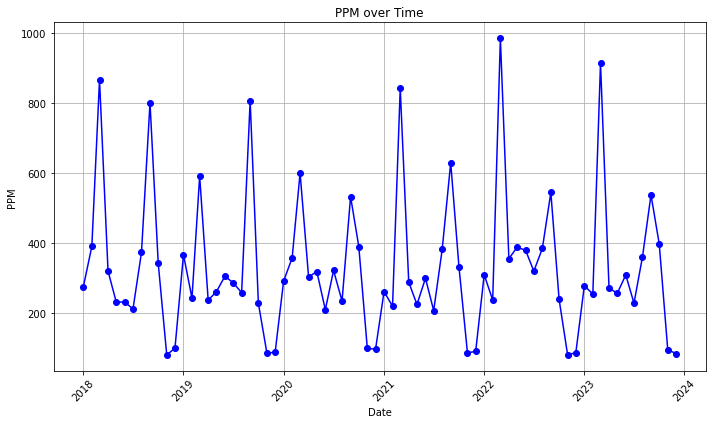

In [261]:
df['Date'] = pd.to_datetime(df['Date'])

# Ensure correct indexing and plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].values, df['ppm'].values, marker='o', linestyle='-', color='b')
plt.title('PPM over Time')
plt.xlabel('Date')
plt.ylabel('PPM')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

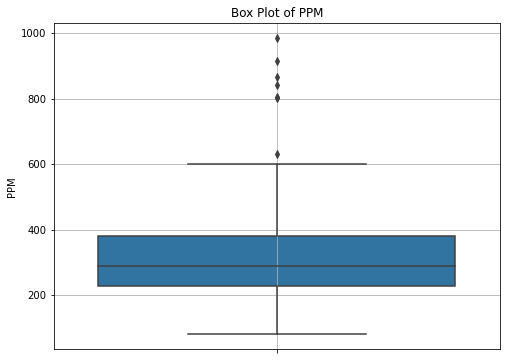

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the box plot (single box plot for all years)
plt.figure(figsize=(8, 6))
sns.boxplot(y='ppm', data=df)
plt.title('Box Plot of PPM')
plt.ylabel('PPM')
plt.grid(True)
plt.show()


In [266]:
Q1 = df['ppm'].quantile(0.25)
Q3 = df['ppm'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
mon_fore = df[(df['ppm'] >= lower_bound) & (df['ppm'] <= upper_bound)]
mon_fore

,Date,ppm,Year
0,2018-01-01,274.908024,2018
1,2018-02-01,390.142861,2018
3,2018-04-01,319.731697,2018
4,2018-05-01,231.203728,2018
5,2018-06-01,231.198904,2018
...,...,...,...
67,2023-08-01,360.439396,2023
68,2023-09-01,537.275322,2023
69,2023-10-01,397.377387,2023
70,2023-11-01,95.444895,2023


In [267]:
outliers = df[(df['ppm'] < lower_bound) | (df['ppm'] > upper_bound)]
outliers


,Date,ppm,Year
2,2018-03-01,865.996971,2018
8,2018-09-01,800.557506,2018
20,2019-09-01,805.926447,2019
38,2021-03-01,842.116513,2021
44,2021-09-01,629.389991,2021
50,2022-03-01,984.792314,2022
62,2023-03-01,914.368755,2023


C:\Users\preet\AppData\Local\Temp\ipykernel_3400\620061708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])


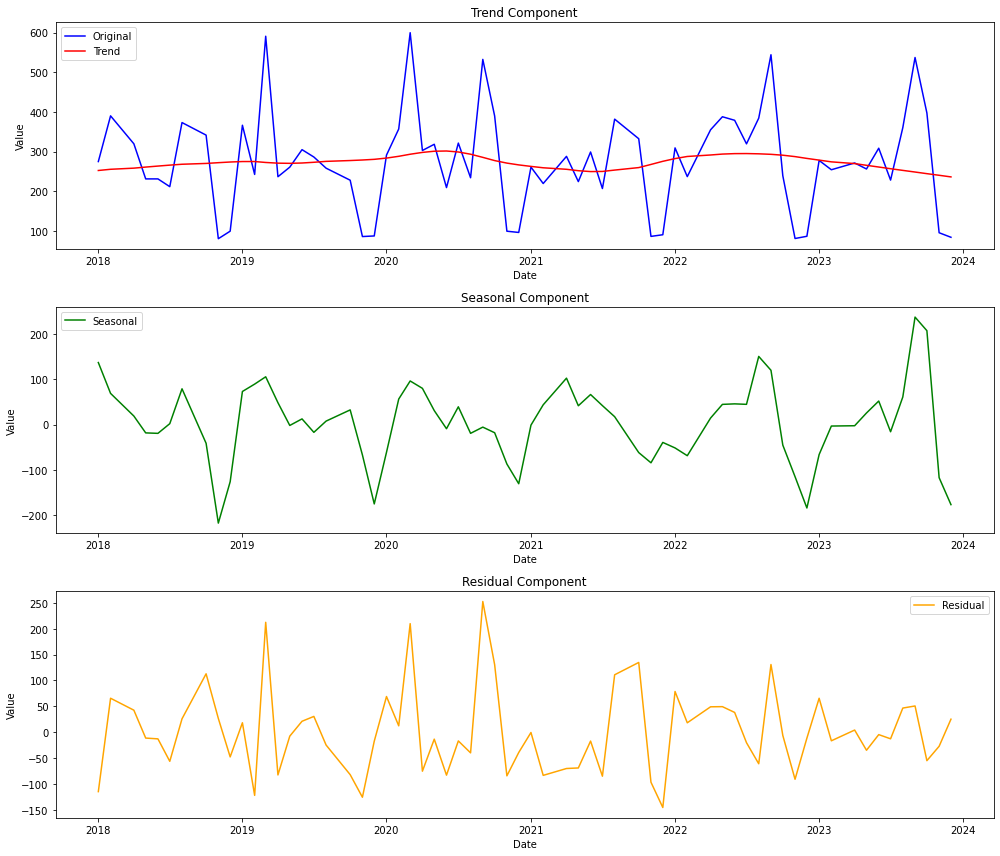

In [268]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import STL

# Ensure 'Date' column is datetime
mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])

# Define the seasonal period (adjust as needed)
seasonal_period = 12  # Example: monthly data with yearly seasonality

# STL decomposition
decomposition = STL(mon_fore['ppm'], period=seasonal_period).fit()

# Extract components
trend = decomposition.trend.values
seasonal = decomposition.seasonal.values
residual = decomposition.resid.values

# Plot each component
plt.figure(figsize=(14, 12))

# Original and Trend
plt.subplot(3, 1, 1)
plt.plot(mon_fore['Date'].values, mon_fore['ppm'].values, label='Original', color='blue')
plt.plot(mon_fore['Date'].values, trend, label='Trend', color='red')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Seasonal
plt.subplot(3, 1, 2)
plt.plot(mon_fore['Date'].values, seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Residual
plt.subplot(3, 1, 3)
plt.plot(mon_fore['Date'].values, residual, label='Residual', color='orange')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


In [269]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
# Ensure Date column is in datetime format
mon_fore.loc[:, 'Date'] = pd.to_datetime(mon_fore['Date'])

# Extract time-based features using .loc to avoid the warning
mon_fore.loc[:, 'year'] = mon_fore['Date'].dt.year
mon_fore.loc[:, 'month'] = mon_fore['Date'].dt.month
mon_fore.loc[:, 'quarter'] = mon_fore['Date'].dt.quarter
mon_fore.loc[:, 'day_of_month'] = mon_fore['Date'].dt.day
mon_fore.loc[:, 'day_of_week'] = mon_fore['Date'].dt.dayofweek
mon_fore.loc[:, 'week_of_year'] = mon_fore['Date'].dt.isocalendar().week
mon_fore.loc[:, 'is_month_start'] = mon_fore['Date'].dt.is_month_start
mon_fore.loc[:, 'is_month_end'] = mon_fore['Date'].dt.is_month_end

# Lagged features
mon_fore.loc[:, 'ppm_lag1'] = mon_fore['ppm'].shift(1)
mon_fore.loc[:, 'ppm_lag2'] = mon_fore['ppm'].shift(2)

# Rolling features
mon_fore.loc[:, 'ppm_rolling_mean_3'] = mon_fore['ppm'].rolling(window=3).mean()
mon_fore.loc[:, 'ppm_rolling_std_3'] = mon_fore['ppm'].rolling(window=3).std()

# Sine/Cosine transformations for cyclic features (e.g., month)
mon_fore.loc[:, 'month_sin'] = np.sin(2 * np.pi * mon_fore['month'] / 12)
mon_fore.loc[:, 'month_cos'] = np.cos(2 * np.pi * mon_fore['month'] / 12)

# Time elapsed since the first date
mon_fore.loc[:, 'time_elapsed'] = (mon_fore['Date'] - mon_fore['Date'].min()).dt.days

# Fourier terms to capture yearly seasonality
mon_fore.loc[:, 'fourier_sin'] = np.sin(2 * np.pi * mon_fore['time_elapsed'] / 365)
mon_fore.loc[:, 'fourier_cos'] = np.cos(2 * np.pi * mon_fore['time_elapsed'] / 365)

# Fill any NaN values generated by lagging or rolling with 0
mon_fore.fillna(0, inplace=True)
ppm_positive = mon_fore['ppm'] + 1e-6  # Small shift to ensure positive values
mon_fore['transformed_ppm'], lambda_bc = boxcox(ppm_positive)

# Display the updated DataFrame
mon_fore.head()


C:\Users\preet\AppData\Local\Temp\ipykernel_3400\1503937282.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore.loc[:, 'year'] = mon_fore['Date'].dt.year
C:\Users\preet\AppData\Local\Temp\ipykernel_3400\1503937282.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore.loc[:, 'month'] = mon_fore['Date'].dt.month
C:\Users\preet\AppData\Local\Temp\ipykernel_3400\1503937282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Date,ppm,Year,year,month,quarter,day_of_month,day_of_week,week_of_year,is_month_start,...,ppm_lag1,ppm_lag2,ppm_rolling_mean_3,ppm_rolling_std_3,month_sin,month_cos,time_elapsed,fourier_sin,fourier_cos,transformed_ppm
0,2018-01-01,274.908024,2018,2018,1,1,1,0,1,True,...,0.000000,0.000000,0.000000,0.000000,5.000000e-01,0.866025,0,0.000000,1.000000,65.081000
1,2018-02-01,390.142861,2018,2018,2,1,1,3,5,True,...,274.908024,0.000000,0.000000,0.000000,8.660254e-01,0.500000,31,0.508671,0.860961,82.920813
3,2018-04-01,319.731697,2018,2018,4,2,1,6,13,True,...,390.142861,274.908024,328.260861,58.088957,8.660254e-01,-0.500000,90,0.999769,0.021516,72.262044
4,2018-05-01,231.203728,2018,2018,5,2,1,1,18,True,...,319.731697,390.142861,313.692762,79.641469,5.000000e-01,-0.866025,120,0.880012,-0.474951,57.705752
5,2018-06-01,231.198904,2018,2018,6,2,1,4,22,True,...,231.203728,319.731697,260.711443,51.113039,1.224647e-16,-1.000000,151,0.516062,-0.856551,57.704915


In [271]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Define a function to perform ADF test
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    return result[1]  # p-value

# Load your DataFrame
# mon_fore = pd.read_csv('path_to_your_data.csv')

# List of features to test
features = ['ppm_lag1', 'ppm_lag2', 'ppm_rolling_mean_3', 'ppm_rolling_std_3', 'month_sin', 'month_cos',
            'time_elapsed', 'fourier_sin', 'fourier_cos', 'transformed_ppm']

# Perform ADF test and store results
results = {}
for feature in features:
    p_value = adf_test(mon_fore[feature])
    results[feature] = p_value

# Print results
for feature, p_value in results.items():
    print(f'Feature: {feature}, ADF p-value: {p_value}')


Feature: ppm_lag1, ADF p-value: 0.06017509625081009
Feature: ppm_lag2, ADF p-value: 0.010379664679021246
Feature: ppm_rolling_mean_3, ADF p-value: 0.010831123553781312
Feature: ppm_rolling_std_3, ADF p-value: 0.00012826122849765999
Feature: month_sin, ADF p-value: 0.24174616189315268
Feature: month_cos, ADF p-value: 1.7990503484501694e-07
Feature: time_elapsed, ADF p-value: 0.8738267703833869
Feature: fourier_sin, ADF p-value: 1.226839617213615e-11
Feature: fourier_cos, ADF p-value: 2.0723237081063173e-13
Feature: transformed_ppm, ADF p-value: 0.03989422997287057


In [272]:
import pandas as pd

# Create a DataFrame with all features and transformed_ppm
feature_df = mon_fore[['ppm_lag1', 'ppm_lag2', 'ppm_rolling_mean_3', 'ppm_rolling_std_3', 'month_sin', 'month_cos',
                 'time_elapsed', 'fourier_sin', 'fourier_cos', 'transformed_ppm']]

# Calculate the correlation matrix
corr_matrix = feature_df.corr()

# Check the correlation of each feature with the target variable
corr_with_target = corr_matrix['transformed_ppm'].sort_values(ascending=False)
print(corr_with_target)

transformed_ppm       1.000000
ppm_rolling_mean_3    0.431938
ppm_lag1              0.258383
fourier_sin           0.245646
month_sin             0.045644
time_elapsed         -0.024591
ppm_rolling_std_3    -0.185562
ppm_lag2             -0.221563
fourier_cos          -0.324201
month_cos            -0.389928
Name: transformed_ppm, dtype: float64


In [185]:
mon_fore.reset_index(inplace=True)

C:\Users\preet\AppData\Local\Temp\ipykernel_3400\4061158102.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
C:\Users\preet\AppData\Local\Temp\ipykernel_3400\4061158102.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['transformed_ppm'], lambda_bc = boxcox(ppm_positive)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency informati

Train MSE: 1895.0792393493819
Test MSE: 5481.881534021194
Train R^2: 0.6268792769111435
Test R^2: 0.46160903939136133


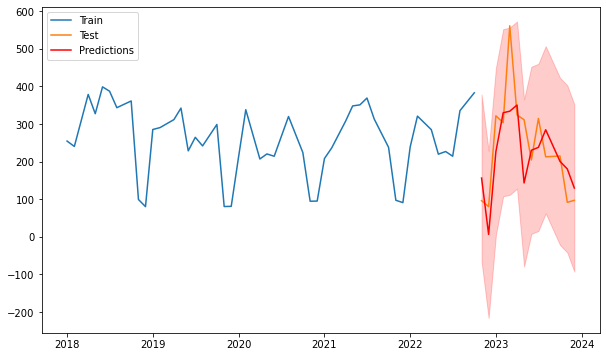

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from scipy.special import inv_boxcox
from scipy.stats import boxcox

# Set the random seed for reproducibility
np.random.seed(42)

# Convert 'Date' to DateTimeIndex and set as index
mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
mon_fore.set_index('Date', inplace=True)

# Perform Box-Cox transformation on 'ppm' and get lambda
ppm_positive = mon_fore['ppm'] + 1e-6  # Small shift to ensure positive values
mon_fore['transformed_ppm'], lambda_bc = boxcox(ppm_positive)

# Define features and target variable
X = mon_fore[['ppm_rolling_std_3', 'ppm_lag2', 'ppm_rolling_mean_3']]
y = mon_fore['transformed_ppm']

# Split the data into training and testing sets, preserving the index
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Preserve the original DateTimeIndex for y_train and y_test
y_train.index = X_train.index
y_test.index = X_test.index

# Perform ADF test on the non-stationary variable
# Define and fit the SARIMAX model with differenced exogenous variable
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarimax_model = model.fit()

# Make predictions
train_pred = sarimax_model.predict(start=0, end=len(y_train)-1, exog=X_train)
test_pred = sarimax_model.predict(start=len(y_train), end=len(y)-1, exog=X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Inverse Box-Cox transformation for original and predicted values
y_train_original = inv_boxcox(y_train, lambda_bc)
y_test_original = inv_boxcox(y_test, lambda_bc)
train_pred_inv = inv_boxcox(train_pred, lambda_bc)
test_pred_inv = inv_boxcox(test_pred, lambda_bc)

# Calculate upper and lower intervals based on the confidence level (e.g., 95%)
ci_multiplier = 3  # for 95% confidence level, you may adjust based on actual confidence interval
test_ci_upper = test_pred_inv + ci_multiplier * np.sqrt(test_mse)
test_ci_lower = test_pred_inv - ci_multiplier * np.sqrt(test_mse)

# Convert indices and data to numpy arrays for plotting
y_train_index = y_train.index.to_numpy()
y_train_original = y_train_original.to_numpy()
y_test_index = y_test.index.to_numpy()
y_test_original = y_test_original.to_numpy()
test_pred_inv = test_pred_inv.to_numpy()
test_ci_upper = test_ci_upper.to_numpy()
test_ci_lower = test_ci_lower.to_numpy()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_train_index, y_train_original, label='Train')
plt.plot(y_test_index, y_test_original, label='Test')
plt.plot(y_test_index, test_pred_inv, label='Predictions', color='red')
plt.fill_between(y_test_index, test_ci_lower, test_ci_upper, color='red', alpha=0.2)
plt.legend()
plt.show()


In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from scipy.special import inv_boxcox

# Set the random seed for reproducibility
np.random.seed(42)

# Convert 'Date' to DateTimeIndex and set as index
mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
mon_fore.set_index('Date', inplace=True)

# Define features and target variable
X = mon_fore[["ppm_rolling_mean_3", "ppm_lag1", "fourier_sin"]]
y = mon_fore['transformed_ppm']

# Check stationarity of features
def check_stationarity(series):
    result = adfuller(series)
    return result[1]  # p-value

# Apply differencing if necessary
X_diff = X.diff().dropna()
X_diff.columns = [col + '_diff' for col in X.columns]

# Update features with differenced data
X = X_diff

# Split the data into training and testing sets, preserving the index
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Preserve the original DateTimeIndex for y_train and y_test
y_train.index = X_train.index
y_test.index = X_test.index

# Define and fit the SARIMAX model with differenced exogenous variable
model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model = model.fit()

# Make predictions
train_pred = sarimax_model.predict(start=0, end=len(y_train)-1, exog=X_train)
test_pred = sarimax_model.predict(start=len(y_train), end=len(y)-1, exog=X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Inverse Box-Cox transformation for original and predicted values
lambda_value = 0.5  # Replace this with the actual lambda value used in your Box-Cox transformation
y_train_original = inv_boxcox(y_train, lambda_value)
y_test_original = inv_boxcox(y_test, lambda_value)
train_pred_inv = inv_boxcox(train_pred, lambda_value)
test_pred_inv = inv_boxcox(test_pred, lambda_value)

# Calculate upper and lower intervals based on the confidence level (e.g., 95%)
ci_multiplier = 4  # for 95% confidence level, you may adjust based on actual confidence interval
test_ci_upper = test_pred_inv + ci_multiplier * np.sqrt(test_mse)
test_ci_lower = test_pred_inv - ci_multiplier * np.sqrt(test_mse)

# Debugging: Print shapes and types of variables
print(f"y_train.index type: {type(y_train.index)}")
print(f"y_train_original shape: {y_train_original.shape}")
print(f"test_pred_inv shape: {test_pred_inv.shape}")

# Convert indices and data to numpy arrays for plotting
y_train_index = y_train.index.to_numpy()
y_train_original = y_train_original.to_numpy()
y_test_index = y_test.index.to_numpy()
y_test_original = y_test_original.to_numpy()
test_pred_inv = test_pred_inv.to_numpy()
test_ci_upper = test_ci_upper.to_numpy()
test_ci_lower = test_ci_lower.to_numpy()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_train_index, y_train_original, label='Train')
plt.plot(y_test_index, y_test_original, label='Test')
plt.plot(y_test_index, test_pred_inv, label='Predictions', color='red')
plt.fill_between(y_test_index, test_ci_lower, test_ci_upper, color='red', alpha=0.2)
plt.legend()
plt.show()


KeyError: 'Date'

C:\Users\preet\AppData\Local\Temp\ipykernel_3400\3454773489.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966:

Train MSE: 382.72385953662507
Test MSE: 81.12829816671936
Train R^2: 0.07386547923811526
Test R^2: 0.8453275429893348
y_train.index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
y_train_original shape: (51,)
test_pred_inv shape: (13,)


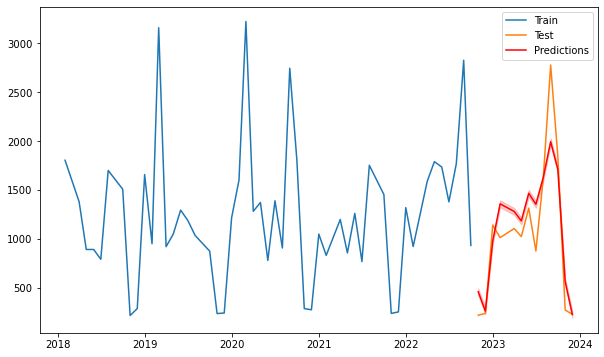

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from scipy.special import inv_boxcox

# Set the random seed for reproducibility
np.random.seed(42)

# Convert 'Date' to DateTimeIndex and set as index
mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
mon_fore.set_index('Date', inplace=True)

# Define features and target variable
X = mon_fore[["ppm_rolling_mean_3", "ppm_lag1", "fourier_sin"]]
y = mon_fore['transformed_ppm']

# Check stationarity of features
def check_stationarity(series):
    result = adfuller(series)
    return result[1]  # p-value

# Apply differencing if necessary
X_diff = X.diff().dropna()
X_diff.columns = [col + '_diff' for col in X.columns]

# Ensure y is aligned with X_diff
y_aligned = y[X_diff.index]

# Update features with differenced data
X = X_diff

# Split the data into training and testing sets, preserving the index
X_train, X_test, y_train, y_test = train_test_split(X, y_aligned, test_size=0.2, shuffle=False)

# Preserve the original DateTimeIndex for y_train and y_test
y_train.index = X_train.index
y_test.index = X_test.index

# Define and fit the SARIMAX model with differenced exogenous variable
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarimax_model = model.fit()

# Make predictions
train_pred = sarimax_model.predict(start=0, end=len(y_train)-1, exog=X_train)
test_pred = sarimax_model.predict(start=len(y_train), end=len(y_aligned)-1, exog=X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Inverse Box-Cox transformation for original and predicted values
lambda_value = 0.5  # Replace this with the actual lambda value used in your Box-Cox transformation
y_train_original = inv_boxcox(y_train, lambda_value)
y_test_original = inv_boxcox(y_test, lambda_value)
train_pred_inv = inv_boxcox(train_pred, lambda_value)
test_pred_inv = inv_boxcox(test_pred, lambda_value)

# Calculate upper and lower intervals based on the confidence level (e.g., 95%)
ci_multiplier = 4  # for 95% confidence level, you may adjust based on actual confidence interval
test_ci_upper = test_pred_inv + ci_multiplier * np.sqrt(test_mse)
test_ci_lower = test_pred_inv - ci_multiplier * np.sqrt(test_mse)

# Debugging: Print shapes and types of variables
print(f"y_train.index type: {type(y_train.index)}")
print(f"y_train_original shape: {y_train_original.shape}")
print(f"test_pred_inv shape: {test_pred_inv.shape}")

# Convert indices and data to numpy arrays for plotting
y_train_index = y_train.index.to_numpy()
y_train_original = y_train_original.to_numpy()
y_test_index = y_test.index.to_numpy()
y_test_original = y_test_original.to_numpy()
test_pred_inv = test_pred_inv.to_numpy()
test_ci_upper = test_ci_upper.to_numpy()
test_ci_lower = test_ci_lower.to_numpy()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_train_index, y_train_original, label='Train')
plt.plot(y_test_index, y_test_original, label='Test')
plt.plot(y_test_index, test_pred_inv, label='Predictions', color='red')
plt.fill_between(y_test_index, test_ci_lower, test_ci_upper, color='red', alpha=0.2)
plt.legend()
plt.show()


In [187]:
mon_fore

,ppm,Year,ppm_lag1,ppm_lag2,ppm_rolling_mean_3,ppm_rolling_std_3,year,month,quarter,day_of_month,day_of_week,week_of_year,is_month_start,is_month_end,month_sin,month_cos,time_elapsed,fourier_sin,fourier_cos,transformed_ppm
Date,,,,,,,,,,,,,,,,,,,,
2018-01-01,254.472658,2018,0.000000,0.000000,0.000000,0.000000,2018,1970-01-01 00:00:00.000000001,1,1,0,1,True,False,5.000000e-01,0.866025,0,0.000000,1.000000,204.933312
2018-02-01,240.169016,2018,254.472658,0.000000,0.000000,0.000000,2018,1970-01-01 00:00:00.000000002,1,1,3,5,True,False,8.660254e-01,0.500000,31,0.508671,0.860961,193.882547
2018-04-01,378.443133,2018,240.169016,254.472658,291.028269,76.040564,2018,1970-01-01 00:00:00.000000004,2,1,6,13,True,False,8.660254e-01,-0.500000,90,0.999769,0.021516,299.641215
2018-05-01,327.167409,2018,378.443133,240.169016,315.259853,69.901898,2018,1970-01-01 00:00:00.000000005,2,1,1,18,True,False,5.000000e-01,-0.866025,120,0.880012,-0.474951,260.678440
2018-06-01,398.539710,2018,327.167409,378.443133,368.050084,36.803708,2018,1970-01-01 00:00:00.000000006,2,1,4,22,True,False,1.224647e-16,-1.000000,151,0.516062,-0.856551,314.842645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,314.602641,2023,204.179574,311.200380,276.660865,62.793686,2023,1970-01-01 00:00:00.000000007,3,1,5,26,True,False,-5.000000e-01,-0.866025,2007,0.008607,-0.999963,251.088773
2023-08-01,212.681706,2023,314.602641,204.179574,243.821307,61.445663,2023,1970-01-01 00:00:00.000000008,3,1,1,31,True,False,-8.660254e-01,-0.500000,2038,-0.501242,-0.865307,172.557843
2023-10-01,214.852754,2023,212.681706,314.602641,247.379034,58.227471,2023,1970-01-01 00:00:00.000000010,4,1,6,39,True,False,-8.660254e-01,0.500000,2099,-0.999991,0.004304,174.246638


C:\Users\preet\AppData\Local\Temp\ipykernel_3400\3447451966.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966:

Train MSE: 382.72385953662507
Test MSE: 81.12829816671936
Train R^2: 0.07386547923811526
Test R^2: 0.8453275429893348
y_train.index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
y_train_original shape: (51,)
test_pred_inv shape: (13,)


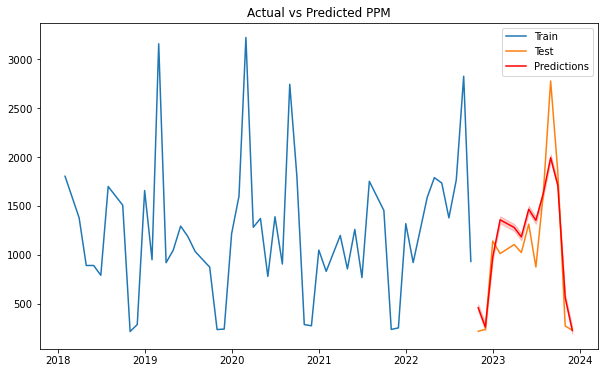

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


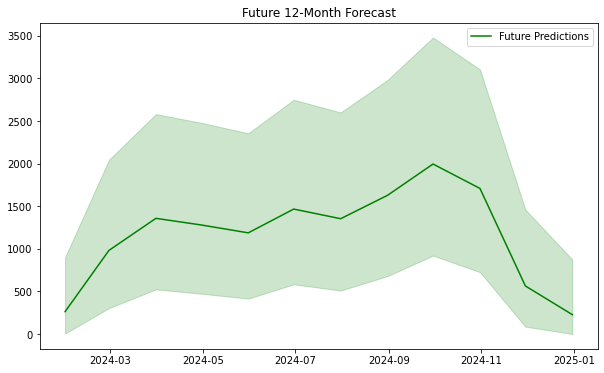

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from scipy.special import inv_boxcox

# Set the random seed for reproducibility
np.random.seed(42)

# Convert 'Date' to DateTimeIndex and set as index
mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
mon_fore.set_index('Date', inplace=True)

# Define features and target variable
X = mon_fore[["ppm_rolling_mean_3", "ppm_lag1", "fourier_sin"]]
y = mon_fore['transformed_ppm']

# Check stationarity of features
def check_stationarity(series):
    result = adfuller(series)
    return result[1]  # p-value

# Apply differencing if necessary
X_diff = X.diff().dropna()
X_diff.columns = [col + '_diff' for col in X.columns]

# Ensure y is aligned with X_diff
y_aligned = y[X_diff.index]

# Update features with differenced data
X = X_diff

# Split the data into training and testing sets, preserving the index
X_train, X_test, y_train, y_test = train_test_split(X, y_aligned, test_size=0.2, shuffle=False)

# Preserve the original DateTimeIndex for y_train and y_test
y_train.index = X_train.index
y_test.index = X_test.index

# Define and fit the SARIMAX model with differenced exogenous variable
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarimax_model = model.fit()

# Make predictions
train_pred = sarimax_model.predict(start=0, end=len(y_train)-1, exog=X_train)
test_pred = sarimax_model.predict(start=len(y_train), end=len(y_aligned)-1, exog=X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Inverse Box-Cox transformation for original and predicted values
lambda_value = 0.5  # Replace this with the actual lambda value used in your Box-Cox transformation
y_train_original = inv_boxcox(y_train, lambda_value)
y_test_original = inv_boxcox(y_test, lambda_value)
train_pred_inv = inv_boxcox(train_pred, lambda_value)
test_pred_inv = inv_boxcox(test_pred, lambda_value)

# Calculate upper and lower intervals based on the confidence level (e.g., 95%)
ci_multiplier = 4  # for 95% confidence level, you may adjust based on actual confidence interval
test_ci_upper = test_pred_inv + ci_multiplier * np.sqrt(test_mse)
test_ci_lower = test_pred_inv - ci_multiplier * np.sqrt(test_mse)

# Debugging: Print shapes and types of variables
print(f"y_train.index type: {type(y_train.index)}")
print(f"y_train_original shape: {y_train_original.shape}")
print(f"test_pred_inv shape: {test_pred_inv.shape}")

# Convert indices and data to numpy arrays for plotting
y_train_index = y_train.index.to_numpy()
y_train_original = y_train_original.to_numpy()
y_test_index = y_test.index.to_numpy()
y_test_original = y_test_original.to_numpy()
test_pred_inv = test_pred_inv.to_numpy()
test_ci_upper = test_ci_upper.to_numpy()
test_ci_lower = test_ci_lower.to_numpy()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_train_index, y_train_original, label='Train')
plt.plot(y_test_index, y_test_original, label='Test')
plt.plot(y_test_index, test_pred_inv, label='Predictions', color='red')
plt.fill_between(y_test_index, test_ci_lower, test_ci_upper, color='red', alpha=0.2)
plt.legend()
plt.title('Actual vs Predicted PPM')
plt.show()

# ======================== Future Forecasting ========================

# Forecasting for 12 future steps
forecast_steps = 12
future_pred = sarimax_model.get_forecast(steps=forecast_steps, exog=X_test[-forecast_steps:])

# Get forecasted mean and confidence intervals
forecast_mean = future_pred.predicted_mean
forecast_ci = future_pred.conf_int()

# Create future dates for the next 12 steps
last_date = y_test.index[-1]
future_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='M')[1:]

# Inverse Box-Cox transformation for forecasted values
future_pred_inv = inv_boxcox(forecast_mean, lambda_value)
future_ci_upper = inv_boxcox(forecast_ci.iloc[:, 1], lambda_value)
future_ci_lower = inv_boxcox(forecast_ci.iloc[:, 0], lambda_value)

# Convert future indices and predictions to numpy arrays for plotting
future_dates = future_dates.to_numpy()
future_pred_inv = future_pred_inv.to_numpy()
future_ci_upper = future_ci_upper.to_numpy()
future_ci_lower = future_ci_lower.to_numpy()

# Plot the future forecast
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_pred_inv, label='Future Predictions', color='green')
plt.fill_between(future_dates, future_ci_lower, future_ci_upper, color='green', alpha=0.2)
plt.legend()
plt.title('Future 12-Month Forecast')
plt.show()


In [275]:
mon_fore.reset_index(inplace=True)

In [203]:
import pandas as pd
from sklearn.feature_selection import f_regression, mutual_info_regression

# Assuming mon_fore is your DataFrame
# Drop 'ppm' and 'transformed_ppm' as these are not features, 'transformed_ppm' is the target
X = mon_fore.drop(columns=['ppm', 'transformed_ppm'])

# Drop non-numeric columns (e.g., date columns)
X_numeric = X.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Define target variable
y = mon_fore['transformed_ppm']

# f-regression
f_values, p_values = f_regression(X_numeric, y)

# Mutual Information
mi = mutual_info_regression(X_numeric, y)

# Create a DataFrame for better visualization
feature_stats_df = pd.DataFrame({
    'Feature': X_numeric.columns,
    'F-Value': f_values,
    'P-Value': p_values,
    'Mutual Information': mi
})

# Sort by Mutual Information
feature_stats_df = feature_stats_df.sort_values(by='Mutual Information', ascending=False)

# Print the DataFrame
print(feature_stats_df)


              Feature    F-Value   P-Value  Mutual Information
3   ppm_rolling_std_3   4.747721  0.033343            0.350961
5           month_cos  22.178830  0.000016            0.317888
2  ppm_rolling_mean_3  28.048178  0.000002            0.264988
8         fourier_cos  10.085098  0.002377            0.264669
7         fourier_sin  16.508397  0.000145            0.239207
4           month_sin   2.611091  0.111454            0.219881
1            ppm_lag2   0.002011  0.964384            0.019682
0            ppm_lag1  11.780281  0.001100            0.000000
6        time_elapsed   0.820374  0.368755            0.000000


In [218]:
import statsmodels.api as sm

# Define the endogenous variable (target) as transformed_ppm
endog = mon_fore['transformed_ppm']

# Define the exogenous variables (features)
exog = mon_fore[['ppm_rolling_std_3', 'month_cos', 'ppm_rolling_mean_3', 'fourier_cos', 'fourier_sin']]

# Fit the SARIMAX model
# Adjust the order and seasonal_order parameters based on your data's properties
model = sm.tsa.SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = model.fit()

# Print the model summary
print(sarimax_results.summary())

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                    transformed_ppm   No. Observations:                   61
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -266.981
Date:                            Sun, 15 Sep 2024   AIC                            553.962
Time:                                    10:13:53   BIC                            572.674
Sample:                                         0   HQIC                           561.034
                                             - 61                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ppm_rolling_std_3     -0.9526      0.284     -3.352      0.001      -1.510      -0.396
month_cos  

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [219]:
import statsmodels.api as sm

# Define the endogenous variable (target) as transformed_ppm
endog = mon_fore['transformed_ppm']

# Define the exogenous variables (features)
exog = mon_fore[['ppm_rolling_std_3', 'month_cos', 'ppm_rolling_mean_3', 'fourier_cos', 'fourier_sin']]

# Fit the SARIMAX model
# Adjust the order and seasonal_order parameters based on your data's properties
model = sm.tsa.SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarimax_results = model.fit()

# Print the model summary
print(sarimax_results.summary())

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                    transformed_ppm   No. Observations:                   61
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -326.851
Date:                            Sun, 15 Sep 2024   AIC                            673.701
Time:                                    10:14:48   BIC                            694.810
Sample:                                         0   HQIC                           681.974
                                             - 61                                         
Covariance Type:                              opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
ppm_rolling_std_3     -0.8118      0.266     -3.048      0.002      -1.334      -0.290
month_cos  

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\preet\AppData\Local\Temp\ipykernel_3400\3149798888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
C:\Users\preet\AppData\Local\Temp\ipykernel_3400\3149798888.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_fore['transformed_ppm'], lambda_bc = boxcox(ppm_positive)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency informati

Train MSE: 2983.414644959505
Test MSE: 3276.145299356305
Train R^2: 0.44708661916044645
Test R^2: 0.668477567115052
y_train.index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
y_train_original shape: (48,)
test_pred_inv shape: (12,)


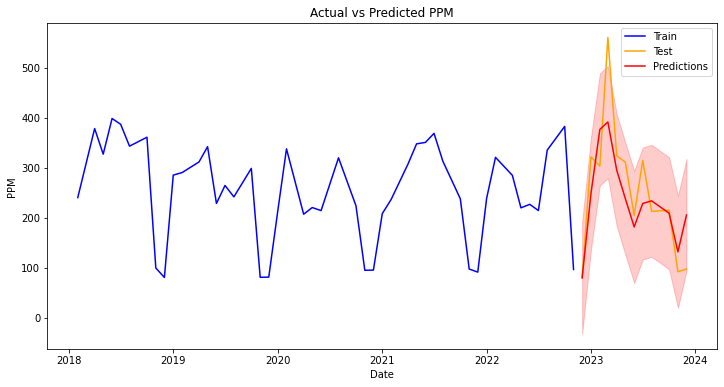

C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


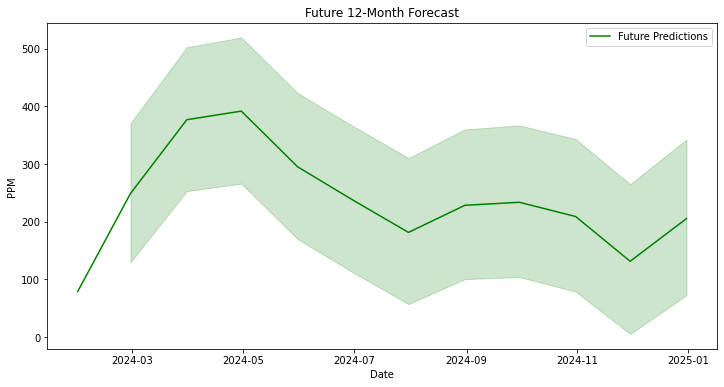

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from scipy.special import inv_boxcox
from scipy.stats import boxcox

# Set the random seed for reproducibility
np.random.seed(42)

# Convert 'Date' to DateTimeIndex and set as index
mon_fore['Date'] = pd.to_datetime(mon_fore['Date'])
mon_fore.set_index('Date', inplace=True)

# Perform Box-Cox transformation on 'ppm' and get lambda
ppm_positive = mon_fore['ppm'] + 1e-6  # Small shift to ensure positive values
mon_fore['transformed_ppm'], lambda_bc = boxcox(ppm_positive)

# Define features and target variable
X = mon_fore[["ppm_rolling_mean_3","ppm_rolling_std_3","ppm_lag1"]]
y = mon_fore['transformed_ppm']

# Check stationarity of features
def check_stationarity(series):
    result = adfuller(series)
    return result[1]  # p-value

# Apply differencing if necessary
X_diff = X.diff().dropna()
X_diff.columns = [col + '_diff' for col in X.columns]

# Ensure y is aligned with X_diff
y_aligned = y[X_diff.index]

# Update features with differenced data
X = X_diff

# Split the data into training and testing sets, preserving the index
X_train, X_test, y_train, y_test = train_test_split(X, y_aligned, test_size=0.2, shuffle=False)

# Preserve the original DateTimeIndex for y_train and y_test
y_train.index = X_train.index
y_test.index = X_test.index

# Define and fit the SARIMAX model with differenced exogenous variable
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarimax_model = model.fit()

# Make predictions
train_pred = sarimax_model.predict(start=0, end=len(y_train)-1, exog=X_train)
test_pred = sarimax_model.predict(start=len(y_train), end=len(y_aligned)-1, exog=X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Inverse Box-Cox transformation for original and predicted values
y_train_original = inv_boxcox(y_train, lambda_bc)
y_test_original = inv_boxcox(y_test, lambda_bc)
train_pred_inv = inv_boxcox(train_pred, lambda_bc)
test_pred_inv = inv_boxcox(test_pred, lambda_bc)

# Calculate upper and lower intervals based on the confidence level (e.g., 95%)
ci_multiplier = 1.96  # for 95% confidence level
test_ci_upper = test_pred_inv + ci_multiplier * np.sqrt(test_mse)
test_ci_lower = test_pred_inv - ci_multiplier * np.sqrt(test_mse)

# Debugging: Print shapes and types of variables
print(f"y_train.index type: {type(y_train.index)}")
print(f"y_train_original shape: {y_train_original.shape}")
print(f"test_pred_inv shape: {test_pred_inv.shape}")

# Convert indices and data to numpy arrays for plotting
y_train_index = y_train.index.to_numpy()
y_train_original = y_train_original.to_numpy()
y_test_index = y_test.index.to_numpy()
y_test_original = y_test_original.to_numpy()
test_pred_inv = test_pred_inv.to_numpy()
test_ci_upper = test_ci_upper.to_numpy()
test_ci_lower = test_ci_lower.to_numpy()

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train_index, y_train_original, label='Train', color='blue')
plt.plot(y_test_index, y_test_original, label='Test', color='orange')
plt.plot(y_test_index, test_pred_inv, label='Predictions', color='red')
plt.fill_between(y_test_index, test_ci_lower, test_ci_upper, color='red', alpha=0.2)
plt.legend()
plt.title('Actual vs Predicted PPM')
plt.xlabel('Date')
plt.ylabel('PPM')
plt.show()

# ======================== Future Forecasting ========================

# Forecasting for 12 future steps
forecast_steps = 12
future_pred = sarimax_model.get_forecast(steps=forecast_steps, exog=X_test[-forecast_steps:])

# Get forecasted mean and confidence intervals
forecast_mean = future_pred.predicted_mean
forecast_ci = future_pred.conf_int()

# Create future dates for the next 12 steps
last_date = y_test.index[-1]
future_dates = pd.date_range(last_date, periods=forecast_steps + 1, freq='M')[1:]

# Inverse Box-Cox transformation for forecasted values
future_pred_inv = inv_boxcox(forecast_mean, lambda_bc)
future_ci_upper = inv_boxcox(forecast_ci.iloc[:, 1], lambda_bc)
future_ci_lower = inv_boxcox(forecast_ci.iloc[:, 0], lambda_bc)

# Convert future indices and predictions to numpy arrays for plotting
future_dates = future_dates.to_numpy()
future_pred_inv = future_pred_inv.to_numpy()
future_ci_upper = future_ci_upper.to_numpy()
future_ci_lower = future_ci_lower.to_numpy()

# Plot the future forecast
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_pred_inv, label='Future Predictions', color='green')
plt.fill_between(future_dates, future_ci_lower, future_ci_upper, color='green', alpha=0.2)
plt.legend()
plt.title('Future 12-Month Forecast')
plt.xlabel('Date')
plt.ylabel('PPM')
plt.show()


In [244]:
mon_fore.reset_index(inplace=True)

In [246]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Define the range of p, d, q, P, D, Q, and s to try
p = d = q = range(0, 3)  # You can adjust this range based on what you want to test
P = D = Q = range(0, 2)
seasonal_period = [12]  # Monthly seasonality for example

# Generate all combinations of p, d, q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, seasonal_period))

# Track best model
best_aic = float("inf")
best_order = None
best_seasonal_order = None
best_model = None

# Perform grid search over the SARIMAX parameter space
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Fit SARIMAX model
            model = SARIMAX(y_train, exog=X_train, order=param, seasonal_order=param_seasonal)
            sarimax_model = model.fit(disp=False)
            
            # Evaluate model using AIC
            aic = sarimax_model.aic
            print(f"SARIMAX{param}x{param_seasonal} - AIC:{aic}")
            
            # Select model with lowest AIC
            if aic < best_aic:
                best_aic = aic
                best_order = param
                best_seasonal_order = param_seasonal
                best_model = sarimax_model
        except Exception as e:
            print(f"Error fitting SARIMAX{param}x{param_seasonal}: {e}")
            continue

print(f"\nBest SARIMAX{best_order}x{best_seasonal_order} - AIC:{best_aic}")

# Train the best model found
sarimax_best = SARIMAX(y_train, exog=X_train, order=best_order, seasonal_order=best_seasonal_order).fit()

# Make predictions with the best model
train_pred = sarimax_best.predict(start=0, end=len(y_train)-1, exog=X_train)
test_pred = sarimax_best.predict(start=len(y_train), end=len(y)-1, exog=X_test)

# Evaluate the model on the test set
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:654.1073166153064


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:623.6694771357056
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:416.13535331887795


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:415.12425526658296


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:579.3079093131796


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:578.7240851480453


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:416.57986602666574


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:416.32689882511664


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:606.706693038288


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:581.4058276718866
SARIMAX(0, 0, 1)x(0, 1, 0, 12) - AIC:410.09030137898975


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:409.57178770470455


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:560.18392602403


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(0, 0, 1)x(1, 0, 1, 12) - AIC:561.200878610283
SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:410.802981796216


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(0, 0, 1)x(1, 1, 1, 12) - AIC:410.90358401180504
SARIMAX(0, 0, 2)x(0, 0, 0, 12) - AIC:591.0735494063022


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 0, 2)x(0, 0, 1, 12) - AIC:569.6958268280632
SARIMAX(0, 0, 2)x(0, 1, 0, 12) - AIC:411.8051326776166


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(0, 0, 2)x(0, 1, 1, 12) - AIC:411.545706091702


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 0, 2)x(1, 0, 0, 12) - AIC:573.3133715605177


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(0, 0, 2)x(1, 0, 1, 12) - AIC:574.6821498288934
SARIMAX(0, 0, 2)x(1, 1, 0, 12) - AIC:412.5738134216444


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(0, 0, 2)x(1, 1, 1, 12) - AIC:412.8741324601934
SARIMAX(0, 1, 0)x(0, 0, 0, 12) - AIC:516.543708679713


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 0)x(0, 0, 1, 12) - AIC:517.5965596804818
SARIMAX(0, 1, 0)x(0, 1, 0, 12) - AIC:409.9027840121158


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too 

SARIMAX(0, 1, 0)x(0, 1, 1, 12) - AIC:408.82602648092455
SARIMAX(0, 1, 0)x(1, 0, 0, 12) - AIC:518.0599645766413


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(0, 1, 0)x(1, 0, 1, 12) - AIC:518.891588469744


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 0)x(1, 1, 0, 12) - AIC:410.75917186864433


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(0, 1, 0)x(1, 1, 1, 12) - AIC:410.22360598216716
SARIMAX(0, 1, 1)x(0, 0, 0, 12) - AIC:513.2403886432563


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 1, 1)x(0, 0, 1, 12) - AIC:514.3463076517519
SARIMAX(0, 1, 1)x(0, 1, 0, 12) - AIC:407.33852182308533


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:407.88029597514526


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)x(1, 0, 0, 12) - AIC:514.9609560246755


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 1, 1)x(1, 0, 1, 12) - AIC:513.3875385336551


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:408.9117899325243


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(0, 1, 1)x(1, 1, 1, 12) - AIC:408.7989963534184
SARIMAX(0, 1, 2)x(0, 0, 0, 12) - AIC:507.45267973021714


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 1, 2)x(0, 0, 1, 12) - AIC:508.9609113514049


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 2)x(0, 1, 0, 12) - AIC:404.2795340968297


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(0, 1, 2)x(0, 1, 1, 12) - AIC:404.64544156389496


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 1, 2)x(1, 0, 0, 12) - AIC:509.23961858215915


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(0, 1, 2)x(1, 0, 1, 12) - AIC:509.27412670112864
SARIMAX(0, 1, 2)x(1, 1, 0, 12) - AIC:405.4290737022835


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(0, 1, 2)x(1, 1, 1, 12) - AIC:405.87483590125106
SARIMAX(0, 2, 0)x(0, 0, 0, 12) - AIC:544.2009458514098


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 2, 0)x(0, 0, 1, 12) - AIC:544.3506678584623
SARIMAX(0, 2, 0)x(0, 1, 0, 12) - AIC:428.61920228142964


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(0, 2, 0)x(0, 1, 1, 12) - AIC:426.3902282030216
SARIMAX(0, 2, 0)x(1, 0, 0, 12) - AIC:545.0578874833765


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 2, 0)x(1, 0, 1, 12) - AIC:546.0246005342065


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 2, 0)x(1, 1, 0, 12) - AIC:428.5446087992638


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(0, 2, 0)x(1, 1, 1, 12) - AIC:428.2217948581389
SARIMAX(0, 2, 1)x(0, 0, 0, 12) - AIC:512.5273845282627


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 2, 1)x(0, 0, 1, 12) - AIC:513.9512287512166
SARIMAX(0, 2, 1)x(0, 1, 0, 12) - AIC:404.6974080907781


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(0, 2, 1)x(0, 1, 1, 12) - AIC:404.43966258211077


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 2, 1)x(1, 0, 0, 12) - AIC:514.2275858553908


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 2, 1)x(1, 0, 1, 12) - AIC:515.4053402111949


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(0, 2, 1)x(1, 1, 0, 12) - AIC:405.8617920708844


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(0, 2, 1)x(1, 1, 1, 12) - AIC:405.65812950722926
SARIMAX(0, 2, 2)x(0, 0, 0, 12) - AIC:510.38919282141296


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(0, 2, 2)x(0, 0, 1, 12) - AIC:511.92136762253597


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(0, 1, 0, 12) - AIC:403.06266085682677


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to

SARIMAX(0, 2, 2)x(0, 1, 1, 12) - AIC:404.07071850291254


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(1, 0, 0, 12) - AIC:512.226798452341


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anac

SARIMAX(0, 2, 2)x(1, 0, 1, 12) - AIC:512.4501116675841
SARIMAX(0, 2, 2)x(1, 1, 0, 12) - AIC:404.78931215582116


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to

SARIMAX(0, 2, 2)x(1, 1, 1, 12) - AIC:404.91892289702474
SARIMAX(1, 0, 0)x(0, 0, 0, 12) - AIC:530.6211952045929


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 0, 0)x(0, 0, 1, 12) - AIC:532.1950721278663
SARIMAX(1, 0, 0)x(0, 1, 0, 12) - AIC:412.45003272758987


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(1, 0, 0)x(0, 1, 1, 12) - AIC:410.2235671345663


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)x(1, 0, 0, 12) - AIC:532.4037982818411


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 0, 0)x(1, 0, 1, 12) - AIC:534.0027129702061


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 0)x(1, 1, 0, 12) - AIC:412.7005092053504


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(1, 0, 0)x(1, 1, 1, 12) - AIC:411.6483657028091
SARIMAX(1, 0, 1)x(0, 0, 0, 12) - AIC:528.1234565303306


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 0, 1)x(0, 0, 1, 12) - AIC:529.5408905361348


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 1)x(0, 1, 0, 12) - AIC:411.7741156264191


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 0, 1)x(0, 1, 1, 12) - AIC:411.5293516340394


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 1)x(1, 0, 0, 12) - AIC:529.9471392591652


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(1, 0, 1)x(1, 0, 1, 12) - AIC:529.2773225614859
SARIMAX(1, 0, 1)x(1, 1, 0, 12) - AIC:412.5411697197629


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(1, 0, 1)x(1, 1, 1, 12) - AIC:412.85625910195233


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 0, 2)x(0, 0, 0, 12) - AIC:522.8600114968234


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 2)x(0, 0, 1, 12) - AIC:524.3921223449195


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate

SARIMAX(1, 0, 2)x(0, 1, 0, 12) - AIC:413.0537313692878
SARIMAX(1, 0, 2)x(0, 1, 1, 12) - AIC:413.02464827919266


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\a

SARIMAX(1, 0, 2)x(1, 0, 0, 12) - AIC:524.810610229359


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 0, 2)x(1, 0, 1, 12) - AIC:526.9505337898811
SARIMAX(1, 0, 2)x(1, 1, 0, 12) - AIC:413.8558089343801


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(1, 0, 2)x(1, 1, 1, 12) - AIC:414.5680931600571
SARIMAX(1, 1, 0)x(0, 0, 0, 12) - AIC:514.9721165941351


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 1, 0)x(0, 0, 1, 12) - AIC:515.8469772803539
SARIMAX(1, 1, 0)x(0, 1, 0, 12) - AIC:408.9754402160028


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(1, 1, 0)x(0, 1, 1, 12) - AIC:408.7658532228982


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)x(1, 0, 0, 12) - AIC:516.5229565500354


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 1, 0)x(1, 0, 1, 12) - AIC:516.7642697002115


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 0)x(1, 1, 0, 12) - AIC:410.3416957796391


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(1, 1, 0)x(1, 1, 1, 12) - AIC:409.8571157788207
SARIMAX(1, 1, 1)x(0, 0, 0, 12) - AIC:507.4745051777785


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 1, 1)x(0, 0, 1, 12) - AIC:508.4465151069448


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)x(0, 1, 0, 12) - AIC:406.64047425503014


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 1, 1)x(0, 1, 1, 12) - AIC:405.4808284004375


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 1)x(1, 0, 0, 12) - AIC:509.00867063731494


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(1, 1, 1)x(1, 0, 1, 12) - AIC:509.0978920564524
SARIMAX(1, 1, 1)x(1, 1, 0, 12) - AIC:407.36544479676576


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(1, 1, 1)x(1, 1, 1, 12) - AIC:406.72167937983386
SARIMAX(1, 1, 2)x(0, 0, 0, 12) - AIC:509.2942864033497


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 1, 2)x(0, 0, 1, 12) - AIC:510.39114844093876


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 2)x(0, 1, 0, 12) - AIC:406.111485705534


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 1, 2)x(0, 1, 1, 12) - AIC:406.59254875730664


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 1, 2)x(1, 0, 0, 12) - AIC:510.8995051994121


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(1, 1, 2)x(1, 0, 1, 12) - AIC:511.01889986267685
SARIMAX(1, 1, 2)x(1, 1, 0, 12) - AIC:407.2765317464262


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(1, 1, 2)x(1, 1, 1, 12) - AIC:407.83308486808477
SARIMAX(1, 2, 0)x(0, 0, 0, 12) - AIC:532.2003269662586


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 2, 0)x(0, 0, 1, 12) - AIC:531.716956846966
SARIMAX(1, 2, 0)x(0, 1, 0, 12) - AIC:421.36070221061135


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(1, 2, 0)x(0, 1, 1, 12) - AIC:417.42993241132643


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 0)x(1, 0, 0, 12) - AIC:532.5703676479737


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 2, 0)x(1, 0, 1, 12) - AIC:533.6312556171127


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 0)x(1, 1, 0, 12) - AIC:421.2503089007564


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(1, 2, 0)x(1, 1, 1, 12) - AIC:419.4122512155048
SARIMAX(1, 2, 1)x(0, 0, 0, 12) - AIC:511.54737686710774


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 2, 1)x(0, 0, 1, 12) - AIC:512.8898753529093


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 1)x(0, 1, 0, 12) - AIC:404.227891205021


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 2, 1)x(0, 1, 1, 12) - AIC:404.6933727585695


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 1)x(1, 0, 0, 12) - AIC:513.2768401589287


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(1, 2, 1)x(1, 0, 1, 12) - AIC:513.9875038355933


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 1)x(1, 1, 0, 12) - AIC:405.8029970584484


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(1, 2, 1)x(1, 1, 1, 12) - AIC:405.63212505341403


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\a

SARIMAX(1, 2, 2)x(0, 0, 0, 12) - AIC:507.60854957031836


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(1, 2, 2)x(0, 0, 1, 12) - AIC:508.5924999636401


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\preet\anaconda3\lib\site-p

SARIMAX(1, 2, 2)x(0, 1, 0, 12) - AIC:408.20939938795493
SARIMAX(1, 2, 2)x(0, 1, 1, 12) - AIC:408.44183512435603


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\a

SARIMAX(1, 2, 2)x(1, 0, 0, 12) - AIC:509.2835135239473


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(1, 2, 2)x(1, 0, 1, 12) - AIC:509.35478461097335


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\preet\anaconda3\lib\site-p

SARIMAX(1, 2, 2)x(1, 1, 0, 12) - AIC:409.73013503101515


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(1, 2, 2)x(1, 1, 1, 12) - AIC:409.6692998368628
SARIMAX(2, 0, 0)x(0, 0, 0, 12) - AIC:529.4653011493754


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 0, 0)x(0, 0, 1, 12) - AIC:530.8048835145316
SARIMAX(2, 0, 0)x(0, 1, 0, 12) - AIC:414.3795343273988


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX(2, 0, 0)x(0, 1, 1, 12) - AIC:411.9723145143578
SARIMAX(2, 0, 0)x(1, 0, 0, 12) - AIC:531.2110250810626


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 0, 0)x(1, 0, 1, 12) - AIC:531.9292677202772


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 0, 0)x(1, 1, 0, 12) - AIC:414.42668944317586


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(2, 0, 0)x(1, 1, 1, 12) - AIC:413.47652612733924


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\preet\ana

SARIMAX(2, 0, 1)x(0, 0, 0, 12) - AIC:523.0686460476036


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\preet\ana

SARIMAX(2, 0, 1)x(0, 0, 1, 12) - AIC:532.389467002316
SARIMAX(2, 0, 1)x(0, 1, 0, 12) - AIC:413.7663566606722


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\

SARIMAX(2, 0, 1)x(0, 1, 1, 12) - AIC:413.3103493007919


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\

SARIMAX(2, 0, 1)x(1, 0, 0, 12) - AIC:534.3062394689789


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\preet\ana

SARIMAX(2, 0, 1)x(1, 0, 1, 12) - AIC:534.5852644123459
SARIMAX(2, 0, 1)x(1, 1, 0, 12) - AIC:414.5183898354645


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\

SARIMAX(2, 0, 1)x(1, 1, 1, 12) - AIC:414.5673961580511


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 0, 2)x(0, 0, 0, 12) - AIC:524.7555841374567


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 0, 2)x(0, 0, 1, 12) - AIC:526.4157387059058


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate

SARIMAX(2, 0, 2)x(0, 1, 0, 12) - AIC:415.0142398005029


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 0, 2)x(0, 1, 1, 12) - AIC:415.02380532804096


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 0, 2)x(1, 0, 0, 12) - AIC:527.6755162861091


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 0, 2)x(1, 0, 1, 12) - AIC:532.4881103621865
SARIMAX(2, 0, 2)x(1, 1, 0, 12) - AIC:415.80325937133887


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(2, 0, 2)x(1, 1, 1, 12) - AIC:416.4549508257288
SARIMAX(2, 1, 0)x(0, 0, 0, 12) - AIC:514.5690101028049


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 1, 0)x(0, 0, 1, 12) - AIC:516.4014731722608


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 0)x(0, 1, 0, 12) - AIC:406.33443185106734


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(2, 1, 0)x(0, 1, 1, 12) - AIC:408.0102827892696


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 0)x(1, 0, 0, 12) - AIC:516.526205956463


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(2, 1, 0)x(1, 0, 1, 12) - AIC:516.5424110552885
SARIMAX(2, 1, 0)x(1, 1, 0, 12) - AIC:408.20186548685075


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(2, 1, 0)x(1, 1, 1, 12) - AIC:409.1860017281691
SARIMAX(2, 1, 1)x(0, 0, 0, 12) - AIC:516.4405622252954


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(2, 1, 1)x(0, 0, 1, 12) - AIC:510.37765701546493
SARIMAX(2, 1, 1)x(0, 1, 0, 12) - AIC:406.6812883725927


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(2, 1, 1)x(0, 1, 1, 12) - AIC:408.60078016938894


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 1)x(1, 0, 0, 12) - AIC:518.4281270074091


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(2, 1, 1)x(1, 0, 1, 12) - AIC:512.9783729645626
SARIMAX(2, 1, 1)x(1, 1, 0, 12) - AIC:408.64091821695393


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(2, 1, 1)x(1, 1, 1, 12) - AIC:410.07430017039786
SARIMAX(2, 1, 2)x(0, 0, 0, 12) - AIC:509.14065379576874


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 1, 2)x(0, 0, 1, 12) - AIC:509.5119879290383


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 2)x(0, 1, 0, 12) - AIC:399.3859508024308


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(2, 1, 2)x(0, 1, 1, 12) - AIC:401.3212455884104


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 1, 2)x(1, 0, 0, 12) - AIC:510.50128065513036


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 2)x(1, 0, 1, 12) - AIC:510.9108030129719


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate

SARIMAX(2, 1, 2)x(1, 1, 0, 12) - AIC:401.3022333989636


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 1, 2)x(1, 1, 1, 12) - AIC:402.93660546290636
SARIMAX(2, 2, 0)x(0, 0, 0, 12) - AIC:519.776936896312


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 2, 0)x(0, 0, 1, 12) - AIC:521.3362669989098


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 2, 0)x(0, 1, 0, 12) - AIC:403.6466113241884


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(2, 2, 0)x(0, 1, 1, 12) - AIC:405.1309247678625


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 2, 0)x(1, 0, 0, 12) - AIC:521.5982646122518


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(2, 2, 0)x(1, 0, 1, 12) - AIC:521.2430640070971
SARIMAX(2, 2, 0)x(1, 1, 0, 12) - AIC:405.3349835100121


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(2, 2, 0)x(1, 1, 1, 12) - AIC:406.4100542521198
SARIMAX(2, 2, 1)x(0, 0, 0, 12) - AIC:511.5862363773387


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 2, 1)x(0, 0, 1, 12) - AIC:513.5546686257015


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 2, 1)x(0, 1, 0, 12) - AIC:402.1460803858689


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(2, 2, 1)x(0, 1, 1, 12) - AIC:404.0419599428039


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 2, 1)x(1, 0, 0, 12) - AIC:513.5776480034507


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(2, 2, 1)x(1, 0, 1, 12) - AIC:513.8733880474458
SARIMAX(2, 2, 1)x(1, 1, 0, 12) - AIC:404.1059845769243


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(2, 2, 1)x(1, 1, 1, 12) - AIC:405.6468542481856
SARIMAX(2, 2, 2)x(0, 0, 0, 12) - AIC:513.3905514728077


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX(2, 2, 2)x(0, 0, 1, 12) - AIC:515.387458807126


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 2, 2)x(0, 1, 0, 12) - AIC:402.32951639028033


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMAX(2, 2, 2)x(0, 1, 1, 12) - AIC:404.3277509694768


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX(2, 2, 2)x(1, 0, 0, 12) - AIC:515.3899580578


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\preet\anaconda3\lib

SARIMAX(2, 2, 2)x(1, 0, 1, 12) - AIC:515.3808920033828
SARIMAX(2, 2, 2)x(1, 1, 0, 12) - AIC:404.3286395421181


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\preet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

SARIMAX(2, 2, 2)x(1, 1, 1, 12) - AIC:405.94963831353965

Best SARIMAX(2, 1, 2)x(0, 1, 0, 12) - AIC:399.3859508024308


C:\Users\preet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: Provided exogenous values are not of the appropriate shape. Required (13, 3), got (12, 3).